<a href="https://colab.research.google.com/github/kanchanjaswal/DAB111_PROJECT/blob/main/New_york_house_rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


I will gain some experience in **denoising** a dataset in the context of a specific objective.

**Overall Objective**: Create a model that predicts rent prices as well as possible for typical New York City apartments.

##### Story_Intro : we want to know the feature why there is so much variation in the and my modle will be able to help constomer to get diffrent idea about the diffrent type of the properties .
### **story of the new york**

Declaimer : this one is my college project But I try to do it diffrent way ... IN that one I provide diffrent model with same dataset here I am trying diffrent

### Part 1 - Create and evaluate an initial model


In [1]:
#Reading the csv file
import pandas as pd
df = pd.read_csv("/content/rent_7.csv",error_bad_lines=False, engine="python")
print(df.shape) # print rows, columns
df.head(2)

<ipython-input-1-87ce61bcb909>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/rent_7.csv",error_bad_lines=False, engine="python")


(20000, 16)


,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,longitude,manager_id,photos,price,street_address,interest_level,num_desc_words,num_features
0,2.0,2,4a4da2191c7545ceca3315b5a01c9f4a,2016-06-12 13:51:46,,Columbus Pl,"['Cats Allowed', 'Dogs Allowed']",40.7691,-73.9857,11215cda1d873d587dcdf455001c1b84,['https://photos.renthop.com/2/7152645_684485c...,7300,1 Columbus Pl,low,0,2
1,1.0,0,46b5fd6e1ed6d002f5e6557f7e25bce1,2016-06-22 05:21:01,*LOW FEE* APARTMENT FEATURES:This sun-filled s...,Waverly Place,"['Doorman', 'Elevator', 'Furnished', 'Hardwood...",40.7301,-73.9942,5c7ca9f5239f481c0f35f3faaff188bd,['https://photos.renthop.com/2/7200137_ad4ce4a...,2700,11 Waverly Place,low,169,5


In [2]:
#display the first two values
df.head(2).T

,0,1
bathrooms,2.0,1.0
bedrooms,2,0
building_id,4a4da2191c7545ceca3315b5a01c9f4a,46b5fd6e1ed6d002f5e6557f7e25bce1
created,2016-06-12 13:51:46,2016-06-22 05:21:01
description,,*LOW FEE* APARTMENT FEATURES:This sun-filled s...
display_address,Columbus Pl,Waverly Place
features,"['Cats Allowed', 'Dogs Allowed']","['Doorman', 'Elevator', 'Furnished', 'Hardwood..."
latitude,40.7691,40.7301
longitude,-73.9857,-73.9942
manager_id,11215cda1d873d587dcdf455001c1b84,5c7ca9f5239f481c0f35f3faaff188bd


In [3]:
#getting an information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        20000 non-null  float64
 1   bedrooms         20000 non-null  int64  
 2   building_id      20000 non-null  object 
 3   created          20000 non-null  object 
 4   description      19395 non-null  object 
 5   display_address  19933 non-null  object 
 6   features         20000 non-null  object 
 7   latitude         20000 non-null  float64
 8   longitude        20000 non-null  float64
 9   manager_id       20000 non-null  object 
 10  photos           20000 non-null  object 
 11  price            20000 non-null  int64  
 12  street_address   19993 non-null  object 
 13  interest_level   20000 non-null  object 
 14  num_desc_words   20000 non-null  int64  
 15  num_features     20000 non-null  int64  
dtypes: float64(3), int64(4), object(9)
memory usage: 2.4+ MB


In [4]:
df_num = df[['bathrooms', 'bedrooms', 'longitude', 'latitude', 'price','num_desc_words','num_features']]
df_num.head(2)

,bathrooms,bedrooms,longitude,latitude,price,num_desc_words,num_features
0,2.0,2,-73.9857,40.7691,7300,0,2
1,1.0,0,-73.9942,40.7301,2700,169,5


In [5]:
print(df_num.isnull().any())

bathrooms         False
bedrooms          False
longitude         False
latitude          False
price             False
num_desc_words    False
num_features      False
dtype: bool


In [6]:
#to remove the duplicate values from df
print(df_num.shape)
df_num = df_num.drop_duplicates()
print(df_num.shape)

(20000, 7)
(19283, 7)


In [7]:
#to check the correlation between the target column and features
df_num.corr()['price']

bathrooms         0.040795
bedrooms          0.034651
longitude         0.023329
latitude          0.017095
price             1.000000
num_desc_words   -0.001731
num_features      0.001314
Name: price, dtype: float64

In [8]:
#Separate the features and target columns
X_train = df_num.drop('price', axis=1)
y_train = df_num['price']

In [9]:
#Training and evaluating an initial model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,n_jobs=-1)  #number of trees
#Fit model to the training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [10]:
#Measure of how well the model fits the training data using score()
r2 = rf.score(X_train, y_train)
print( f"{r2:.4f}" )

0.3566


In [11]:
#To train a model that computes and prints the OOB score
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,
                           oob_score=True)   # get error estimate
rf.fit(X_train, y_train)
noisy_oob_r2 = rf.oob_score_
print(f"OOB score {noisy_oob_r2:.4f}")

OOB score -0.7562


In [12]:
#simple test rig with the model-related code emphasized by finding the Validation MAE trials and average absolute error (MAE)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

X, y = df_num.drop('price', axis=1), df_num['price']

errors = []
print(f"Validation MAE trials:", end='')
for i in range(10):
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.20,random_state=22)
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_predicted = rf.predict(X_test)
    e = mean_absolute_error(y_test, y_predicted)
    print(f" ${e:.0f}", end='')
    errors.append(e)
print()
noisy_avg_mae = np.mean(errors)
print(f"Average validation MAE ${noisy_avg_mae:.0f}")

Validation MAE trials: $1420 $1495 $1478 $1412 $1515 $1416 $1522 $1545 $1461 $1577
Average validation MAE $1484


In order to  create a random forest regression model, we first imported the csv file using the read_csv command from pandas. Before starting making a model,we have to get familiarise with the dataset. Certain steps were executed for accomplishing this, and the following insights about the data was revealed.
1.   The dataset has 20000 rows and 16 columns
2.   The features in the dataset are:bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,longitude,manager_id,photos, price,street_address,interest_level,num_desc_words ,num_features
3.  There are no empty cells in any of the columns(null values), in first view.
4.  The features bathrooms, bedrooms, longitude, latitude, price,num_desc_words,num_features only has numerical values.
5. Most important here we are going to take a "price" as a target model and so this is randomforestregression, so clearly we are going to effect of feature on our taget variable, ...

IN simple words we are going to see the relation between the independent variable and dependent variable (price)

As the regression model we are going to develop only works on numerical datas the rest of the features were removed and the resulting dataset df_num is  created.
Some basic pre-cleaning is done by removing duplicate values, and the features num_desc_words , num_features are dropped as they had low-correlation value to price compared to other features in the dataset.The price is chosen target variable, as it has more business value. As being able to predict the price value and finding which features has more impact on price, will be able to help in data-driven decision making.The dataset is split into training and testing datasets.
An initial Random-Forest regression model is made with parameters specifying the number of trees as 100 and to use all the CPU cores for processing the model.

#### another feature we are using to to keep this model in one form:


we are keep the random state fix to 22 other wise every time me run the code value change .
n_estimator = 100 it means number of tree will be 100, prediction and give us result by taking all together and give us the single result .



### Part 2 - Denoise the data

This section should only include the code necessary to **denoise** the data, NOT the code necessary to identify inconsistencies, problems, errors, etc. in the data.
#### Here we are going to discuss the  why it is important to denoise the data , why we take this particular action to denoise

In [13]:
df_num.describe()

,bathrooms,bedrooms,longitude,latitude,price,num_desc_words,num_features
count,19283.000000,19283.000000,19283.000000,19283.000000,1.928300e+04,19283.000000,19283.000000
mean,1.209537,1.536950,-68.040314,40.318832,3.771931e+03,86.730488,-45.828502
std,0.493691,1.118264,26.147207,4.816287,3.345980e+04,58.692143,316.566708
min,0.000000,0.000000,-87.613400,0.000000,-3.000000e+04,0.000000,-2000.000000
25%,1.000000,1.000000,-73.990900,40.726800,2.431500e+03,47.000000,2.000000
50%,1.000000,1.000000,-73.976000,40.751400,3.100000e+03,81.000000,4.000000
75%,1.000000,2.000000,-73.952100,40.775300,4.050000e+03,116.000000,8.000000
max,6.000000,8.000000,65.060700,52.184900,4.490000e+06,663.000000,36.000000


In [14]:
#Examining the data distributions
print(df_num.price.sort_values(ascending=False).head(10))

18699    4490000
456      1150000
11320     111111
16876      85000
6428       80000
15663      55000
11245      53100
293        50550
19042      39995
10017      37000
Name: price, dtype: int64


In [15]:
print(df_num.bathrooms.value_counts())

1.0    15453
2.0     2982
3.0      284
1.5      235
0.0      115
2.5      102
4.0       66
3.5       30
4.5        8
5.0        5
5.5        2
6.0        1
Name: bathrooms, dtype: int64


In [16]:
print(df_num.bedrooms.value_counts())

1    6186
2    5686
0    3729
3    2798
4     762
5      99
6      21
8       2
Name: bedrooms, dtype: int64


###### here we analysed that price minimum value is negative , How it is possible so we use the abs , absolute her to deal negative sign

In [17]:
df['price'] =df['price'].abs()

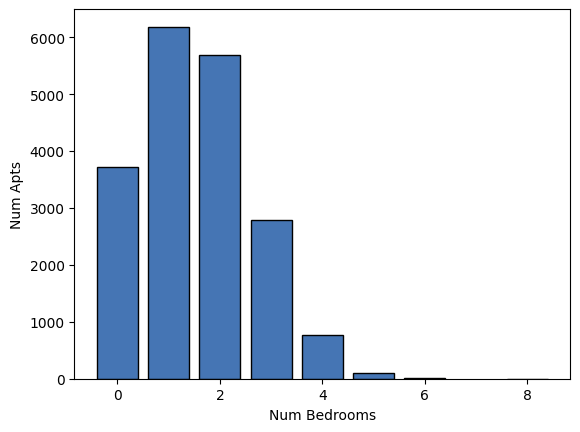

In [18]:
import matplotlib.pyplot as plt
bookcolors = { # our usual book color palette
         'crimson': '#a50026', 'red': '#d73027',
         'redorange': '#f46d43', 'orange': '#fdae61',
         'yellow': '#fee090', 'sky': '#e0f3f8',
         'babyblue': '#abd9e9', 'lightblue': '#74add1',
         'blue': '#4575b4', 'purple': '#313695'}
hist_data = df_num['bedrooms'].value_counts().sort_index()

fig,ax = plt.subplots()
ax.bar(hist_data.index,hist_data.values,color=bookcolors['blue'],edgecolor='black')
ax.set_xlabel('Num Bedrooms')
ax.set_ylabel('Num Apts')

plt.show()

In [19]:
##here we got the something That is not acceptable that we have the number of bedroom = 0 for the almost 3729 rows how can this can be included in our dataset

In [20]:
import pandas as pd

# Assuming df is your original dataframe containing the rental data

# Separate the dataframe into two based on the number of bedrooms
df_with_bedrooms = df_num[df_num['bedrooms'] > 0]  # Subset with nonzero bedrooms
df_without_bedrooms = df_num[df_num['bedrooms'] == 0]  # Subset with zero bedroom
print("Shape of dataframe with nonzero bedrooms:", df_with_bedrooms.shape)
print("Shape of dataframe with zero bedrooms:", df_without_bedrooms.shape)


Shape of dataframe with nonzero bedrooms: (15554, 7)
Shape of dataframe with zero bedrooms: (3729, 7)


In [21]:
print(len(df_with_bedrooms[(df_with_bedrooms.longitude==0.0) & (df_with_bedrooms.latitude==0.0)]))
print(len(df_without_bedrooms[(df_without_bedrooms.longitude==0.0)&(df_without_bedrooms.latitude==0.0)]))

6
0


In [22]:
df_num.head()


,bathrooms,bedrooms,longitude,latitude,price,num_desc_words,num_features
0,2.0,2,-73.9857,40.7691,7300,0,2
1,1.0,0,-73.9942,40.7301,2700,169,5
2,1.0,2,-74.0149,40.7080,3000,60,11
3,1.0,1,-73.9613,40.7198,1600,17,3
4,1.0,0,-73.9848,40.7635,2695,80,1


In [23]:
df_local = df[(df.latitude>40.764) & (df.latitude<40.7678) &
              (df.longitude>=-73.9844) & (df.longitude<=-73.9842) &
           (df.bathrooms==1) & (df.bedrooms==1)]
df_local[['bedrooms','bathrooms','street_address','price']].sort_values('price')

,bedrooms,bathrooms,street_address,price
17808,1,1.0,300 West 55th Street,2400
6553,1,1.0,300 West 55th Street,3350


In [24]:
# filter all records (training/testing)
df1_clean = df_with_bedrooms[(df_with_bedrooms.price>1_000) & (df_with_bedrooms.price<10_000)]

In [25]:
df1_clean = df1_clean.drop(columns=["num_desc_words","num_features"])

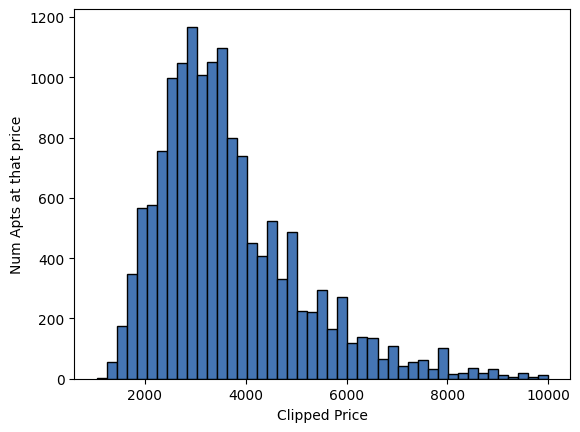

In [26]:
#To visualize the distribution of cleaned-up prices
fig,ax = plt.subplots()
ax.set_xlabel('Clipped Price')
ax.set_ylabel('Num Apts at that price')
ax.hist(df1_clean.price, bins=45, color=bookcolors['blue'],edgecolor='black')
plt.show()

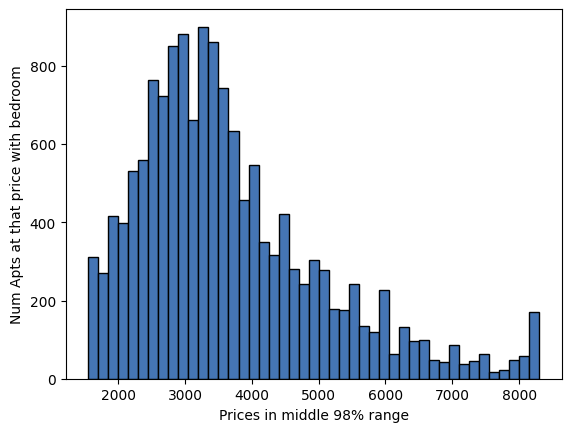

In [27]:
upper, lower = np.percentile(df1_clean.price, [1,99]) # find middle 98% of prices
clipped = np.clip(df1_clean.price, upper, lower)
fig,ax = plt.subplots()
ax.set_xlabel('Prices in middle 98% range')
ax.set_ylabel('Num Apts at that price with bedroom')
ax.hist(clipped, bins=45, color=bookcolors['blue'],edgecolor='black')
plt.show()

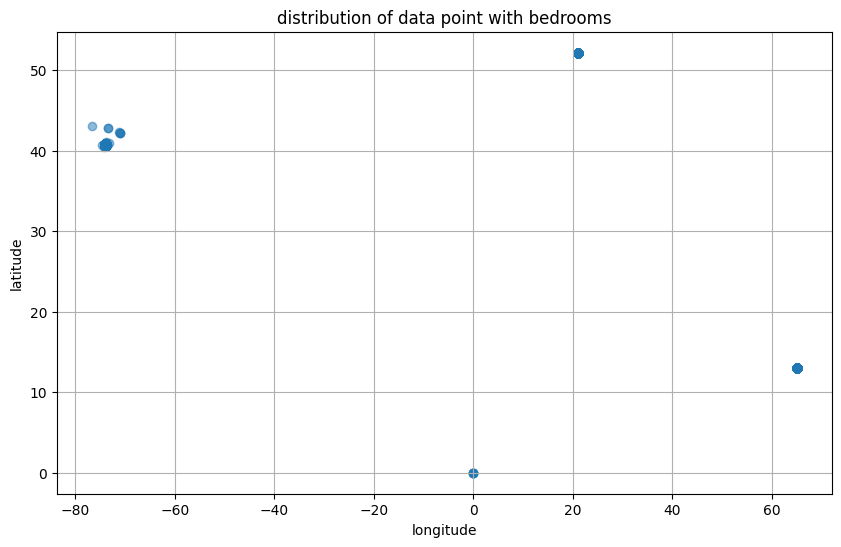

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(df_with_bedrooms['longitude'],df_with_bedrooms['latitude'],alpha=0.5)
plt.title('distribution of data point with bedrooms')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.grid(True)
plt.show()

##### X axis : for the plot Scatterplot: **The longitude** values range from approximately from the -85 to 64 Most of the data points cluster around the -79°to -75°range.

**Latitude (Y-Axis):**

The latitude values span from approximately 40° to 52°N. The majority of data points are concentrated between 40°N and 44°N.

By observing this scatter plot, we can infer that the latitude and longitude coordinates primarily fall within the specified ranges. This information can guide decisions related to mapping, navigation, or any other geographical analysis.

In [29]:
df_missing = df1_clean[(df1_clean.longitude==0) | (df1_clean.latitude==0)]
print(len(df_missing))

6


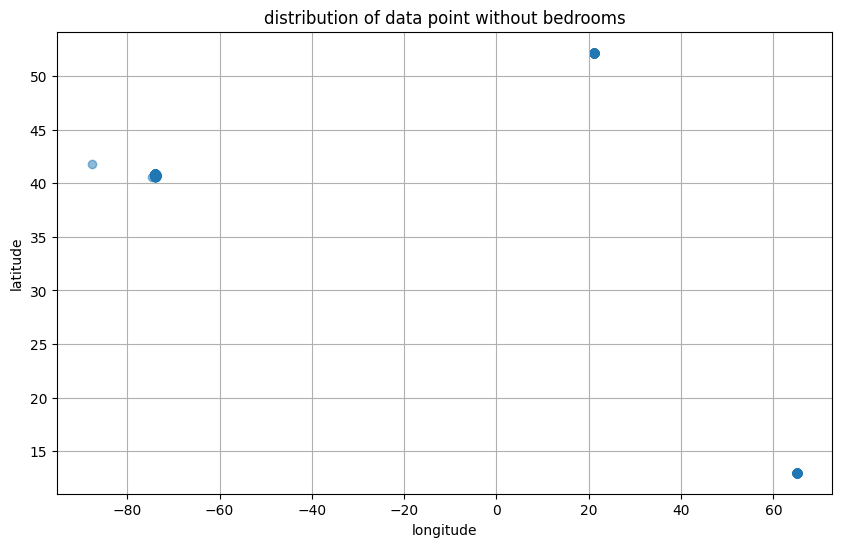

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(df_without_bedrooms['longitude'],df_without_bedrooms['latitude'],alpha=0.5)
plt.title("distribution of data point without bedrooms")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.grid(True)
plt.show()

In [31]:
df1_clean = df1_clean[(df1_clean.longitude!=0) | (df1_clean.latitude!=0)]

In [32]:
df1_cleaned = df1_clean[(df1_clean['latitude']>40.55) &
                    (df1_clean['latitude']<40.94) &
                    (df1_clean['longitude']>-74.1) &
                    (df1_clean['longitude']<-73.67)]

In [33]:
df1_clean.shape

(14795, 5)

In [34]:
 df_without_bedrooms.describe()

,bathrooms,bedrooms,longitude,latitude,price,num_desc_words,num_features
count,3729.000000,3729.0,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000
mean,0.988335,0.0,-68.249007,40.414225,2392.114508,78.314562,-53.034594
std,0.127646,0.0,25.558152,4.598729,2292.476969,54.466654,336.308739
min,0.000000,0.0,-87.613400,12.982000,-4354.000000,0.000000,-2000.000000
25%,1.000000,0.0,-73.993600,40.730100,1999.000000,41.000000,2.000000
50%,1.000000,0.0,-73.978200,40.751800,2400.000000,71.000000,4.000000
75%,1.000000,0.0,-73.954500,40.772900,2750.000000,105.000000,7.000000
max,2.000000,0.0,65.060700,52.184900,111111.000000,376.000000,28.000000


In [35]:
df_with_bedrooms.describe()

,bathrooms,bedrooms,longitude,latitude,price,num_desc_words,num_features
count,15554.000000,15554.000000,15554.000000,15554.000000,1.555400e+04,15554.000000,15554.000000
mean,1.262569,1.905426,-67.990281,40.295962,4.102736e+03,88.748168,-44.100874
std,0.532652,0.920972,26.287030,4.866865,3.723116e+04,59.485690,311.634432
min,0.000000,1.000000,-76.633600,0.000000,-3.000000e+04,0.000000,-2000.000000
25%,1.000000,1.000000,-73.990100,40.725700,2.650000e+03,49.000000,2.000000
50%,1.000000,2.000000,-73.975400,40.751300,3.363500e+03,83.000000,4.000000
75%,1.000000,2.000000,-73.951700,40.775900,4.450000e+03,118.000000,8.000000
max,6.000000,8.000000,65.060700,52.184900,4.490000e+06,663.000000,36.000000


In [36]:
num_house_12000 = (df_without_bedrooms['price']>10000).sum()
print(num_house_12000)

7


In [37]:
num1_house_10000 = (df_with_bedrooms['price']>10000).sum()
print(num1_house_10000)

326


In [38]:
df1_above_10000 = df_with_bedrooms[df_with_bedrooms['price']>10000]
df1_above_10000

,bathrooms,bedrooms,longitude,latitude,price,num_desc_words,num_features
130,3.0,4,-74.0149,40.7169,12455,41,4
193,3.0,3,65.0607,12.9820,14500,180,14
264,2.0,3,-73.9509,40.7826,12750,105,2
293,2.0,2,-73.9636,40.7651,50550,2,9
405,3.0,4,-74.0148,40.7160,13700,180,9
...,...,...,...,...,...,...,...
19891,3.5,3,-73.9703,40.7860,14995,0,1
19902,3.0,4,-73.9707,40.7856,12000,94,5
19912,4.5,4,-73.9530,40.7723,15000,111,15
19965,3.0,6,-73.9912,40.7377,11500,77,6


In [39]:
df_above_12000=df_without_bedrooms[df_without_bedrooms['price']>10000]
print(df_above_12000)

       bathrooms  bedrooms  longitude  latitude   price  num_desc_words  \
227          1.0         0   -73.9636   40.7132   25000               0   
3626         1.0         0   -73.9831   40.7496   12500              16   
4703         1.0         0   -73.9831   40.7311   13995              84   
11245        0.0         0   -74.0008   40.6138   53100             227   
11320        1.0         0   -73.8761   40.7323  111111              89   
14995        1.0         0   -74.0006   40.7244   20000               2   
17344        1.0         0   -73.9988   40.7226   12000              46   

       num_features  
227               1  
3626              1  
4703              1  
11245             1  
11320             3  
14995             1  
17344             1  


In [40]:
df2_clean = df_without_bedrooms[(df_without_bedrooms.price>1_000) & (df_without_bedrooms.price<50000)]

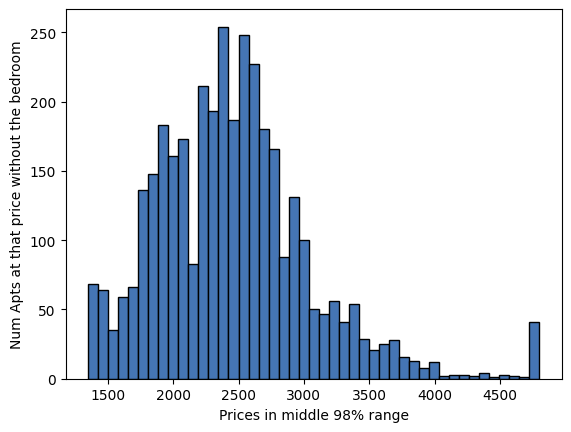

In [41]:
upper, lower = np.percentile(df2_clean.price, [1,99]) # find middle 98% of prices
clipped = np.clip(df2_clean.price, upper, lower)
fig,ax = plt.subplots()
ax.set_xlabel('Prices in middle 98% range')
ax.set_ylabel('Num Apts at that price without the bedroom')
ax.hist(clipped, bins=45, color=bookcolors['blue'],edgecolor='black')
plt.show()

In [42]:
df_missing = df2_clean[(df2_clean.longitude==0) | (df2_clean.latitude==0)]
print(len(df_missing))

0


In [43]:
df2_clean.head()

,bathrooms,bedrooms,longitude,latitude,price,num_desc_words,num_features
1,1.0,0,-73.9942,40.7301,2700,169,5
4,1.0,0,-73.9848,40.7635,2695,80,1
7,1.0,0,-73.9902,40.7342,4365,0,8
11,1.0,0,-73.9511,40.7833,1950,54,2
25,1.0,0,-73.9480,40.7799,1825,56,1


In [44]:


df2_clean.shape

(3623, 7)

In [45]:
df2_clean = df2_clean.drop(columns=["num_desc_words","num_features"])
df2_clean.head()

,bathrooms,bedrooms,longitude,latitude,price
1,1.0,0,-73.9942,40.7301,2700
4,1.0,0,-73.9848,40.7635,2695
7,1.0,0,-73.9902,40.7342,4365
11,1.0,0,-73.9511,40.7833,1950
25,1.0,0,-73.9480,40.7799,1825


In [46]:
df2_cleaned = df2_clean[(df2_clean['latitude']>40.20) &
                    (df2_clean['latitude']<41.00) &
                    (df2_clean['longitude']<-73.20) &
                    (df2_clean['longitude']>-74.00)]

In [47]:
df2_clean.shape

(3623, 5)

In [48]:
df2_cleaned.shape

(2871, 5)

### Part 3 - Create and evaluate a final model

#### Code (15 marks)

In [49]:
#Comparing models trained on denoised data
#from sklearn.metrics import r2_score
X, y = df1_clean.drop('price', axis=1), df1_clean['price']
rf1 = RandomForestRegressor(n_estimators=10,n_jobs=-1,oob_score=True)   # get error estimate
rf1.fit(X, y)
clean_oob_r2 = rf1.oob_score_
print(f"Validation OOB score {clean_oob_r2:.4f}")

Validation OOB score 0.6659


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [50]:
#the Validation MAE trials and average absolute error (MAE)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

X, y = df1_clean.drop('price', axis=1), df1_clean['price']

errors = []
print(f"Validation MAE trials:", end='')
for i in range(10):
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.20,random_state=22)
    rf1 = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    rf1.fit(X_train, y_train)
    y_predicted = rf1.predict(X_test)
    e = mean_absolute_error(y_test, y_predicted)
    print(f" ${e:.0f}", end='')
    errors.append(e)
print()
noisy_avg_mae = np.mean(errors)
print(f"Average validation MAE ${noisy_avg_mae:.0f}")

Validation MAE trials: $434 $433 $430 $432 $431 $431 $431 $430 $433 $430
Average validation MAE $432


In [51]:
from sklearn.linear_model import Lasso
#To train the model and print the  scores for the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
lm1 = Lasso(alpha=0.5) # create linear model
lm1.fit(X_train, y_train)
print(f"LM Training score {lm1.score(X_train, y_train):.4f}")
print(f"LM Validation score {lm1.score(X_test, y_test):.4f}")

LM Training score 0.4250
LM Validation score 0.3956


In [52]:
from sklearn.ensemble import GradientBoostingRegressor
# Gradient boosting model
gbr1 = GradientBoostingRegressor(n_estimators = 2000)
gbr1.fit(X_train, y_train)
print(f"GB Training score {gbr1.score(X_train, y_train):.4f}")
print(f"GB Validation score {gbr1.score(X_test, y_test):.4f}")

GB Training score 0.8460
GB Validation score 0.7511


In [53]:
# import pandas as pd
# print(pd.isnull(y).sum())  # Check for missing values in y
# #

In [54]:


# Filter out negative values
y = y[y >= 0]

# Continue with your remaining code


In [55]:
# import pandas as pd

# # Assuming your dataset is stored in a DataFrame called 'df'
# # Check for values equal to 'Nan' in the entire DataFrame
# nan_values = df.applymap(lambda x: x == 'NaN')

# # Check if any value is equal to 'Nan' in any column
# if nan_values.any().any():
#     print("There are values equal to 'Nan' in the DataFrame.")
# else:
#     print("No values are equal to 'Nan' in the DataFrame.")


In [56]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Ensure y is non-negative by taking its absolute value
y_abs = np.abs(y)

# Apply square root and then logarithm to each price
y_log = np.log(y_abs)

# Fit RandomForestRegressor
rf1 = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
rf1.fit(X, y_log)

# Calculate OOB R^2 score
log_oob_r2 = rf1.oob_score_
print(f"OOB R^2 score for log(price): {log_oob_r2:.4f}")


OOB R^2 score for log(price): 0.8099


In [57]:
print(np.mean(df_local.price))
print(np.mean(np.log(df_local.price)))

2875.0
7.949969820577574


In [58]:
y1_predicted_log = rf1.predict(X_test)
y1_predicted = np.exp(y1_predicted_log)
y1_predicted = np.round(y1_predicted,decimals=2)

print(y1_predicted)

[2919.62 2511.   1712.89 ... 2866.67 2990.68 4857.13]


In [59]:
np.mean(y1_predicted)

3613.9741500506925

### This is the dataset we have the bedroom zero but other feature are still performing a great roll

In [60]:
df_without_bedrooms = df_without_bedrooms.drop('bedrooms',axis=1)

In [61]:
df2_clean = df2_clean.drop('bedrooms',axis=1)

In [62]:
X, y = df2_clean.drop('price', axis=1), df2_clean['price']
rf2 = RandomForestRegressor(n_estimators=10,n_jobs=-1,oob_score=True)   # get error estimate
rf2.fit(X, y)
clean_oob_r2 = rf2.oob_score_
print(f"Validation OOB score {clean_oob_r2:.4f}")

Validation OOB score 0.1603


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [63]:
#the Validation MAE trials and average absolute error (MAE)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

X, y = df2_clean.drop('price', axis=1), df2_clean['price']

errors = []
print(f"Validation MAE trials:", end='')
for i in range(10):
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.20,random_state=22)
    rf2 = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    rf2.fit(X_train, y_train)
    y_predicted = rf2.predict(X_test)
    e = mean_absolute_error(y_test, y_predicted)
    print(f" ${e:.0f}", end='')
    errors.append(e)
print()
noisy_avg_mae = np.mean(errors)
print(f"Average validation MAE ${noisy_avg_mae:.0f}")

Validation MAE trials: $266 $267 $266 $264 $266 $265 $269 $266 $268 $267
Average validation MAE $266


In [64]:
from sklearn.linear_model import Lasso
#To train the model and print the  scores for the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
lm2 = Lasso(alpha=0.5) # create linear model
lm2.fit(X_train, y_train)
print(f"LM Training score {lm2.score(X_train, y_train):.4f}")
print(f"LM Validation score {lm2.score(X_test, y_test):.4f}")

LM Training score 0.0009
LM Validation score -0.0028


In [65]:
from sklearn.ensemble import GradientBoostingRegressor
# Gradient boosting model
gbr2 = GradientBoostingRegressor(n_estimators = 2000)
gbr2.fit(X_train, y_train)
print(f"GB Training score {gbr2.score(X_train, y_train):.4f}")
print(f"GB Validation score {gbr2.score(X_test, y_test):.4f}")

GB Training score 0.9225
GB Validation score 0.1243


In [66]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Ensure y is non-negative by taking its absolute value
y_abs = np.abs(y)

# Apply square root and then logarithm to each price
y_log = np.log(y_abs)

# Fit RandomForestRegressor
rf2 = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
rf2.fit(X, y_log)

# Calculate OOB R^2 score
log_oob_r2 = rf2.oob_score_
print(f"OOB R^2 score for log(price): {log_oob_r2:.4f}")


OOB R^2 score for log(price): 0.6065


In [67]:
y2_predicted_log = rf2.predict(X_test)
y2_predicted = np.exp(y2_predicted_log)
y2_predicted = np.round(y2_predicted,decimals=2)

In [68]:
print(y2_predicted)

[ 2679.35  2797.49  2343.39  2520.3   1578.59  2505.51  1843.03  2489.46
  2707.14  1744.37  2857.61  2641.51  2457.65  3199.04  2731.3   1920.83
  2502.37  2309.43  2282.26  1455.51  2925.1   2484.14  2309.43  2931.12
  1817.19  2199.94  1780.47  2934.54  2228.19  3529.61  2797.49  1840.28
  2795.67  2169.12  2688.31  2687.49  2679.35  1831.62  2243.29  1818.11
  2505.51  2546.42  3202.43  1911.13  2033.22  2489.46  1774.04  3132.53
  2073.53  2062.66  2414.79  1771.73  2046.97  4167.61  2224.12  2505.51
  3173.01  1509.76  2279.88  2126.65  2707.72  2542.63  2309.43  1921.6
  1437.57  1982.04  2047.83  2208.99  2873.53  2471.31  1717.33  2417.42
  2216.36  2232.39  2607.89  2489.28  2458.24  2622.5   2691.07  3150.85
  3457.27  2744.63  2412.81  2982.26  2100.    3155.58  2927.6   2844.82
  2457.36  2932.68  2517.03  2534.7   2939.64  2192.75  2314.33  2505.51
  2801.7   1872.68  2484.99  1919.47  2521.69  2750.55  2416.67  2438.87
  2277.82  2024.64  3056.09  2470.94  2770.86  2634.


| Data issue discovered | Why is this a problem? | How did you fix it? | Why is this fix appropriate? |
| :- | :- | :- | :- |
| Data issue discovered | Why is this a problem? | How did you fix it? | Why is this fix appropriate? |
| :- | :- | :- | :- |
|  we found there is negative price  | price cannot be negative    | we use abs to fix this as value are some similar to positive value just have the negative sign so we treat them as the typo mistake  | **Absolute Value**: abs(), give us magnitute of the value , either we can say that mode of the variable , so we use here it because we dont want to exceed the value range as to deal with the negative sign we had to chance mathematically either mode and square by doing square the value will positive but also price become more unpredicted so we choose abs() to keep the range same  |
| bedroom =0 | almost 3700 rows has the bedroom = 0   |in first time it is like it cant be possible than by doing the analysis on the decription and location these valuse is for some kind of studio and market place e.g these could be shops so that is why we put them into the two diffrent Dataframe | **Reason**: after making two dataframe we see that variation in the location    |
|longitude and latitute value | as we know that this dat is for the new york only so latitute and longitude value like 0.00 are not acceptable so we can remove those |


## **Future Scope** :

###### Now let us suppose that customer come to us with the query what would be the price of the house in perticular region ...
So as a property dealer we can give some detail about location either customer also put the detail in our app:


In [77]:
# Assuming rf1 is your trained RandomForestRegressor model

# Prompt the user to input the number of bedrooms
bathrooms = float(input("Enter the number of bathrooms:"))
bedrooms = float(input("Enter the number of bedrooms: "))

# Prompt the user to input the latitude
longitude = float(input("Enter the longitude: "))
latitude = float(input("Enter the latitude: "))


# Create a new DataFrame with the input values
new_data = pd.DataFrame({'bathrooms': [bathrooms],'bedrooms': [bedrooms],'longitude': [longitude], 'latitude': [latitude]})

# Make predictions using the trained model
predicted_price = rf1.predict(new_data)

# Print the predicted price
print("Predicted price for house apartments:", predicted_price)


Enter the number of bathrooms:2
Enter the number of bedrooms: 6
Enter the longitude: -70.44
Enter the latitude: 40.555
Predicted price for house apartments: [7.69594133]


In [79]:
# Assuming rf2 is your trained RandomForestRegressor model with no bedroom this is area of mall, studio and other type

# Assuming rf1 is your trained RandomForestRegressor model

# Prompt the user to input the number of bedrooms
bathrooms = float(input("Enter the number of bathrooms:"))
bedrooms = float(input("Enter the number of bedrooms: "))

# Prompt the user to input the latitude
longitude = float(input("Enter the longitude: "))
latitude = float(input("Enter the latitude: "))


# Create a new DataFrame with the input values
new_data = pd.DataFrame({'bathrooms': [bathrooms],'longitude': [longitude], 'latitude': [latitude]})

# Make predictions using the trained model
predicted_price = rf2.predict(new_data)

# Print the predicted price
print("Predicted price for house apartments:", predicted_price)

Enter the number of bathrooms:3
Enter the number of bedrooms: 2
Enter the longitude: -70.44
Enter the latitude: 40.55
Predicted price for house apartments: [7.57027078]
